In [1]:
import pandas as pd
import numpy as np
import os
import tensorflow as tf
import keras
import cv2
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

In [2]:
TRAIN_LABELS_FILE = pd.read_csv("train_labels.csv")
TRAIN_DIR = "C:/Users/nithi/.jupyter/train/train"

y_train = []
for i in range(len(TRAIN_LABELS_FILE)):
    y_train.append(str(TRAIN_LABELS_FILE.iloc[i,1]))

In [3]:
y_train = [int(i) for i in y_train]

In [4]:
y_train=np.array(y_train)

In [5]:
X_train = []
for i in range(len(TRAIN_LABELS_FILE)):
    path = os.path.join(TRAIN_DIR,str(TRAIN_LABELS_FILE.iloc[i,0]))
    path = path.replace("\\","/")
    path = path+".tif"
    path=path.replace("\train","/train")
    img = cv2.imread(path)
    resized_img = cv2.resize(img,(128,128))
    X_train.append(resized_img)


In [6]:
X_train_flipped = []
for i in range(len(TRAIN_LABELS_FILE)):
    path = os.path.join(TRAIN_DIR,str(TRAIN_LABELS_FILE.iloc[i,0]))
    path = path.replace("\\","/")
    path = path+".tif"
    path=path.replace("\train","/train")
    img = cv2.imread(path)
    img = cv2.flip(img,-1)
    resized_img = cv2.resize(img,(128,128))
    X_train_flipped.append(resized_img)

In [7]:
X_train_rotated = []
for i in range(len(TRAIN_LABELS_FILE)):
    path = os.path.join(TRAIN_DIR,str(TRAIN_LABELS_FILE.iloc[i,0]))
    path = path.replace("\\","/")
    path = path+".tif"
    path=path.replace("\train","/train")
    img = cv2.imread(path)
    img = cv2.flip(img,cv2.ROTATE_90_COUNTERCLOCKWISE)
    resized_img = cv2.resize(img,(128,128))
    X_train_rotated.append(resized_img)

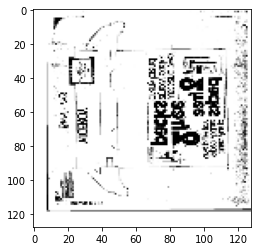

In [8]:
plt.imshow(X_train_rotated[307])

In [9]:
X_train=np.array(X_train,dtype='float16')


In [10]:
X_train=X_train/255

In [11]:
X_train_rotated=np.array(X_train_rotated,dtype='float16')


In [12]:
X_train_rotated=X_train_rotated/255
X_train_rotated

array([[[[1.    , 1.    , 1.    ],
         [1.    , 1.    , 1.    ],
         [1.    , 1.    , 1.    ],
         ...,
         [1.    , 1.    , 1.    ],
         [1.    , 1.    , 1.    ],
         [0.996 , 0.996 , 0.996 ]],

        [[1.    , 1.    , 1.    ],
         [1.    , 1.    , 1.    ],
         [1.    , 1.    , 1.    ],
         ...,
         [1.    , 1.    , 1.    ],
         [1.    , 1.    , 1.    ],
         [1.    , 1.    , 1.    ]],

        [[1.    , 1.    , 1.    ],
         [1.    , 1.    , 1.    ],
         [1.    , 1.    , 1.    ],
         ...,
         [1.    , 1.    , 1.    ],
         [1.    , 1.    , 1.    ],
         [1.    , 1.    , 1.    ]],

        ...,

        [[1.    , 1.    , 1.    ],
         [1.    , 1.    , 1.    ],
         [1.    , 1.    , 1.    ],
         ...,
         [1.    , 1.    , 1.    ],
         [1.    , 1.    , 1.    ],
         [1.    , 1.    , 1.    ]],

        [[1.    , 1.    , 1.    ],
         [1.    , 1.    , 1.    ],
         [1.

In [13]:
TRAIN_LABELS_FILE = pd.read_csv("train_labels.csv")
TRAIN_DIR = "C:/Users/nithi/.jupyter/train/train"
y_train_rotated = []
for i in range(len(TRAIN_LABELS_FILE)):
    y_train_rotated.append(str(TRAIN_LABELS_FILE.iloc[i,1]))
y_train_rotated = [int(i) for i in y_train]

In [14]:
X_train_flipped=np.array(X_train_flipped,dtype='float16')
X_train_flipped[0]

array([[[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [15]:
X_train = np.array(X_train,dtype='float16')
X_train[0]

array([[[0.996, 0.996, 0.996],
        [1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ],
        ...,
        [1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ]],

       [[1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ],
        ...,
        [1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ]],

       [[1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ],
        ...,
        [1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ]],

       ...,

       [[1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ],
        ...,
        [1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ]],

       [[1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ],
        ...,
        [1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ],
        [1.   ,

In [16]:
X_train_flipped=X_train_flipped/255
X_train_flipped

array([[[[1.    , 1.    , 1.    ],
         [1.    , 1.    , 1.    ],
         [1.    , 1.    , 1.    ],
         ...,
         [1.    , 1.    , 1.    ],
         [1.    , 1.    , 1.    ],
         [1.    , 1.    , 1.    ]],

        [[1.    , 1.    , 1.    ],
         [1.    , 1.    , 1.    ],
         [1.    , 1.    , 1.    ],
         ...,
         [1.    , 1.    , 1.    ],
         [1.    , 1.    , 1.    ],
         [1.    , 1.    , 1.    ]],

        [[1.    , 1.    , 1.    ],
         [1.    , 1.    , 1.    ],
         [1.    , 1.    , 1.    ],
         ...,
         [1.    , 1.    , 1.    ],
         [1.    , 1.    , 1.    ],
         [1.    , 1.    , 1.    ]],

        ...,

        [[1.    , 1.    , 1.    ],
         [1.    , 1.    , 1.    ],
         [1.    , 1.    , 1.    ],
         ...,
         [1.    , 1.    , 1.    ],
         [1.    , 1.    , 1.    ],
         [1.    , 1.    , 1.    ]],

        [[1.    , 1.    , 1.    ],
         [1.    , 1.    , 1.    ],
         [1.

In [17]:
X_train[0]

array([[[0.996, 0.996, 0.996],
        [1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ],
        ...,
        [1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ]],

       [[1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ],
        ...,
        [1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ]],

       [[1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ],
        ...,
        [1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ]],

       ...,

       [[1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ],
        ...,
        [1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ]],

       [[1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ],
        ...,
        [1.   , 1.   , 1.   ],
        [1.   , 1.   , 1.   ],
        [1.   ,

In [18]:
X_train.shape

(16000, 128, 128, 3)

In [19]:
X_train_new_train=X_train[:12800]
X_train_new_cval=X_train[12800:16000]


In [20]:
X_train_new_cval.shape

(3200, 128, 128, 3)

In [21]:
X_train_rotated.shape

(16000, 128, 128, 3)

In [22]:
X_train_new_flipped_train=X_train_flipped[:12800]
X_train_new_flipped_cval=X_train_flipped[12800:16000]
X_train_new_rotated_train=X_train_rotated[:12800]
X_train_new_rotated_cval=X_train_rotated[12800:16000]

In [23]:
TRAIN_LABELS_FILE = pd.read_csv("train_labels.csv")
TRAIN_DIR = "C:/Users/nithi/.jupyter/train/train"
y_train_flipped = []
for i in range(len(TRAIN_LABELS_FILE)):
    y_train_flipped.append(str(TRAIN_LABELS_FILE.iloc[i,1]))
y_train_flipped = [int(i) for i in y_train]

In [24]:
y_train_new_train=y_train[:12800]
y_train_new_cval=y_train[12800:16000]
y_train_new_flipped_train=y_train_flipped[:12800]
y_train_new_flipped_cval=y_train_flipped[12800:16000]
y_train_new_rotated_train=y_train_rotated[:12800]
y_train_new_rotated_cval=y_train_rotated[12800:16000]

In [25]:
X_final_new_train=np.concatenate((X_train_new_train,X_train_new_flipped_train,X_train_new_rotated_train))
X_final_new_train.shape

(38400, 128, 128, 3)

In [26]:
X_final_cval=np.concatenate((X_train_new_cval,X_train_new_flipped_cval,X_train_new_rotated_cval))
X_final_cval.shape

(9600, 128, 128, 3)

In [27]:
y_final_train=np.concatenate((y_train_new_train,y_train_new_flipped_train,y_train_new_rotated_train))
y_final_train.shape

(38400,)

In [28]:
y_final_cval=np.concatenate((y_train_new_cval,y_train_new_flipped_cval,y_train_new_rotated_cval))
y_final_cval.shape

(9600,)